# Detecting American Sign Language using K-Nearest Neighbors method


In [2]:
# Imports for this project

import os 
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.neighbors import KNeighborsClassifier

In [3]:

def load_training_dataset(directory):
    """Loads ASL training images

    Args:
        directory (str): directory path

    Returns:
        ndarray: training images and their labels
    """
    images = []
    labels = []

    for label in os.listdir(directory):
        class_folder = os.path.join(directory, label)
        
        if os.path.isdir(class_folder):
            for filename in os.listdir(class_folder):
                img_path = os.path.join(class_folder,filename)
                image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                
                if image is not None:
                    image = cv2.resize(image,(64,64))
                    
                    edges = cv2.Canny(image, 100, 200)
                    edges_normalized = edges / 255.0
                    images.append(edges_normalized.flatten())  # Flatten the matrix to a vector
                    labels.append(label)
                    
    return np.array(images), np.array(labels)

def load_testing_images(directory):
    """Loads ASL testing images

    Args:
        directory (str): directory path

    Returns:
        ndarry: testing images and their labels
    """
    images = []
    labels = []

    for filename in os.listdir(directory):
        if filename.endswith("_test.jpg"):  
            # Extract the label from the filename (assuming format 'A_test.jpg', 'B_test.jpg', etc.)
            label = filename.split('_')[0]
            
            # Construct the full path to the file
            filepath = os.path.join(directory, filename)
            
            # Open and process the image
            image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                # Resize image to ensure uniformity
                image = cv2.resize(image, (64,64))
                # Apply Canny edge detection
                edges = cv2.Canny(image, 100, 200)  # Adjust thresholds as needed
                # Normalize pixel values to 0-1 range
                edges_normalized = edges / 255.0
                images.append(edges_normalized.flatten())  # Flatten the matrix to a vector
                labels.append(label)
    
    # Convert lists to numpy arrays for easier handling in machine learning models
    return np.array(images), np.array(labels)



In [4]:
# Loading first dataset to train and test KNN model
# https://www.kaggle.com/datasets/grassknoted/asl-alphabet

training_directory = "ASL_Alphabet_Dataset/asl_alphabet_train"
testing_directory = "ASL_Alphabet_Dataset/asl_alphabet_test"


training_images, training_labels = load_training_dataset(training_directory)
testing_images, testing_labels = load_testing_images(testing_directory)

In [5]:
# Loading a second dataset to train and test KNN model
# https://www.kaggle.com/datasets/kapillondhe/american-sign-language

training_directory_2 = 'asl_dataset_2/ASL_Dataset/Train'
testing_directory_2 = 'asl_dataset_2/ASL_Dataset/Test'


training_images_2, training_labels_2 = load_training_dataset(training_directory_2)
testing_images_2, testing_labels_2 = load_training_dataset(testing_directory_2)

In [6]:
print(f'Training dataset shape: {training_images.shape}')
print(f'Testing dataset shape: {testing_images.shape}')
print(f'Training dataset 2 shape: {training_images_2.shape}')
print(f'Testing dataset 2 shape: {testing_images_2.shape}')

Training dataset shape: (223074, 4096)
Testing dataset shape: (28, 4096)
Training dataset 2 shape: (165670, 4096)
Testing dataset 2 shape: (112, 4096)


In [7]:
# Creating a KNN model with the nearest 5 neighbors

knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(training_images,training_labels)

knn_5_2 = KNeighborsClassifier(n_neighbors=5)
knn_5_2.fit(training_images_2,training_labels_2)

KNeighborsClassifier()

In [8]:
# Accuracy for when neighbors = 5

accuracy = knn_5.score(testing_images, testing_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

accuracy = knn_5_2.score(testing_images_2, testing_labels_2)
print(f"Test Accuracy 2 : {accuracy * 100:.2f}%")

Test Accuracy: 96.43%
Test Accuracy 2 : 88.39%


In [9]:
# Creating a KNN model with the nearest 10 neighbors

knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10.fit(training_images,training_labels)

knn_10_2 = KNeighborsClassifier(n_neighbors=10)
knn_10_2.fit(training_images_2,training_labels_2)


KNeighborsClassifier(n_neighbors=10)

In [10]:
# Accuracy for when neighbors = 10

accuracy = knn_10.score(testing_images, testing_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

accuracy = knn_10_2.score(testing_images_2, testing_labels_2)
print(f"Test Accuracy 2: {accuracy * 100:.2f}%")

Test Accuracy: 92.86%
Test Accuracy 2: 75.00%


In [17]:
# Creating a KNN model with the nearest 15 neighbors

knn_15 = KNeighborsClassifier(n_neighbors=15)
knn_15.fit(training_images,training_labels)

knn_15_2 = KNeighborsClassifier(n_neighbors=15)
knn_15_2.fit(training_images_2,training_labels_2)

KNeighborsClassifier(n_neighbors=15)

In [18]:
# Accuracy for when neighbors = 15

accuracy = knn_15.score(testing_images, testing_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

accuracy = knn_15_2.score(testing_images_2, testing_labels_2)
print(f"Test Accuracy 2: {accuracy * 100:.2f}%")

Test Accuracy: 85.71%
Test Accuracy 2: 66.96%


Prediction object: ['A']


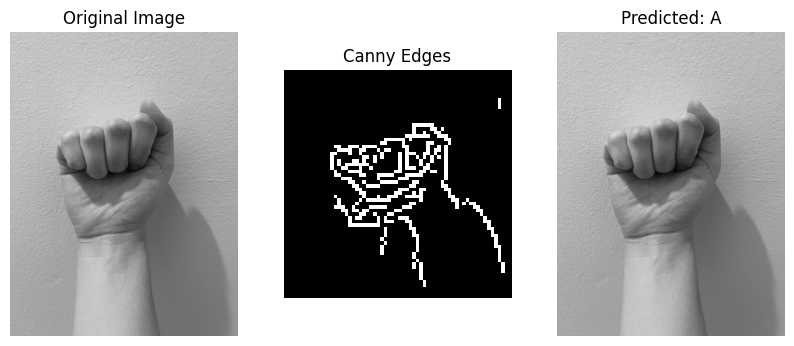

Processed A_Test.jpeg: Predicted Label - A
Prediction object: ['A']


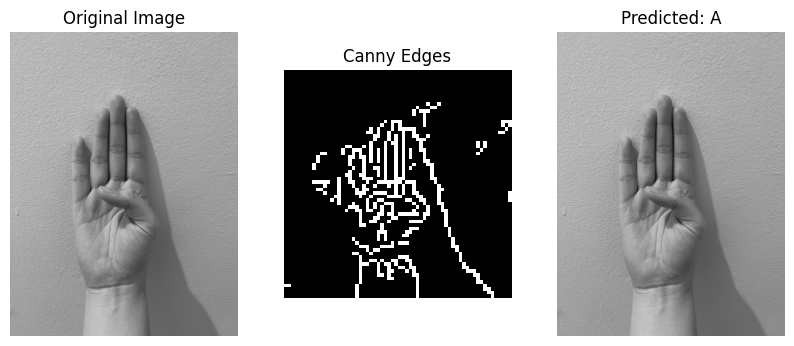

Processed B_Test.jpeg: Predicted Label - A
Prediction object: ['A']


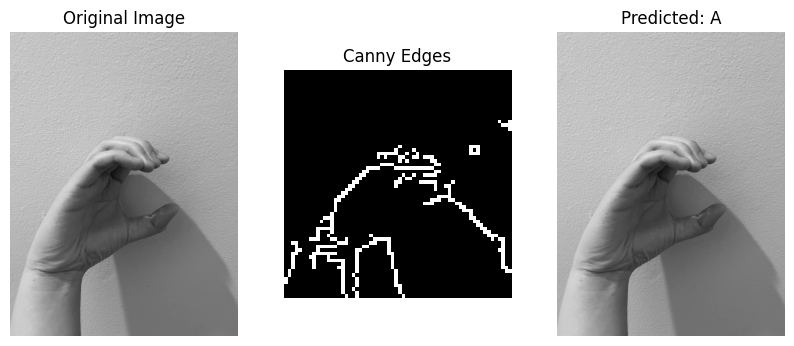

Processed C_Test.jpeg: Predicted Label - A
Prediction object: ['A']


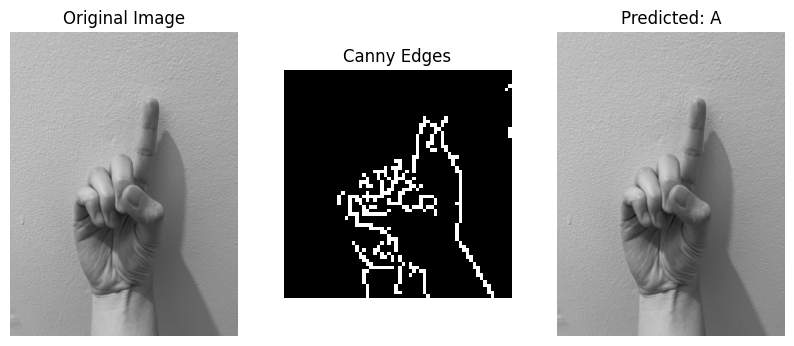

Processed D_Test.jpeg: Predicted Label - A
Prediction object: ['A']


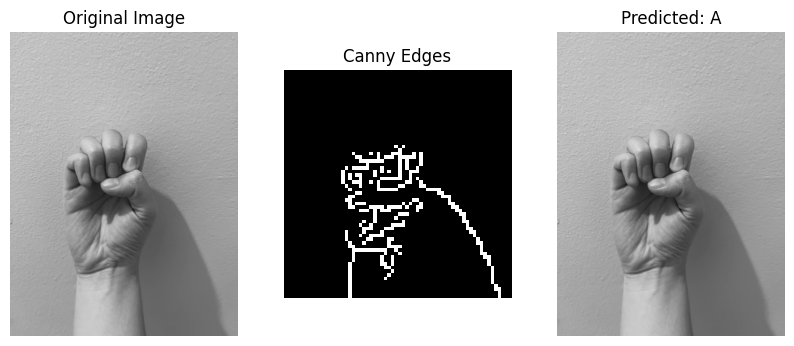

Processed E_Test.jpeg: Predicted Label - A
Prediction object: ['A']


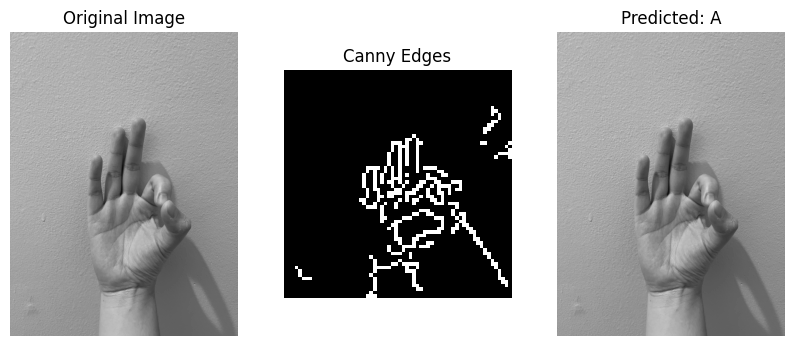

Processed F_Test.jpeg: Predicted Label - A
Prediction object: ['A']


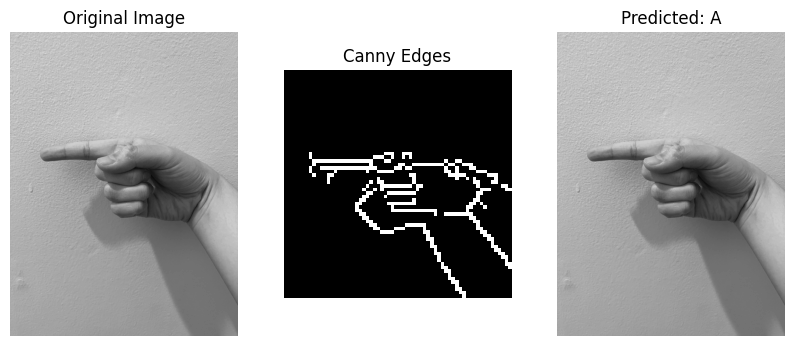

Processed G_Test.jpeg: Predicted Label - A
Prediction object: ['A']


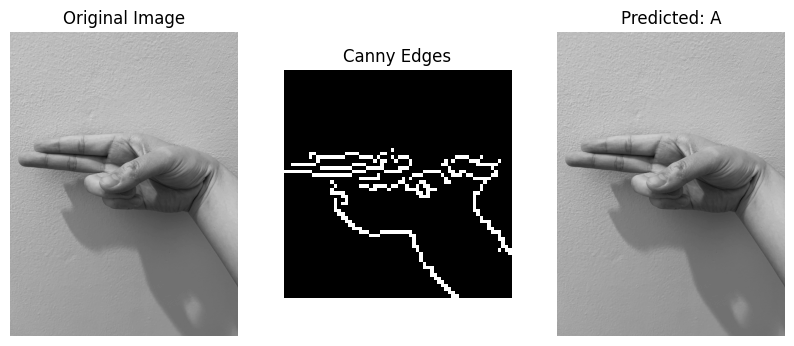

Processed H_Test.jpeg: Predicted Label - A
Prediction object: ['A']


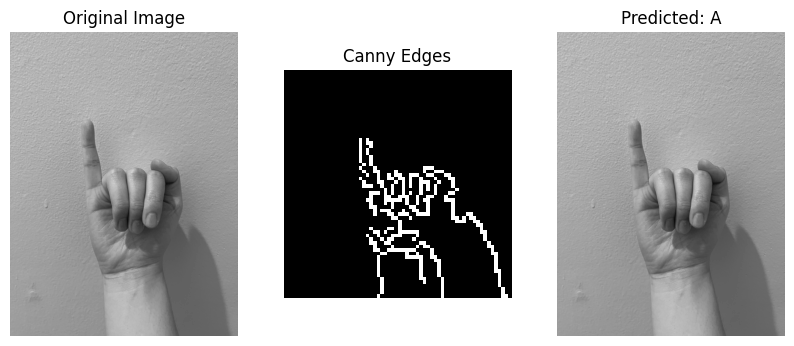

Processed I_Test.jpeg: Predicted Label - A
Prediction object: ['A']


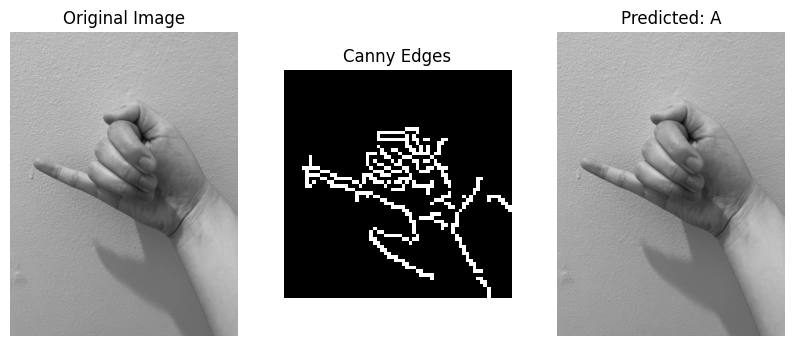

Processed J_Test.jpeg: Predicted Label - A
Prediction object: ['A']


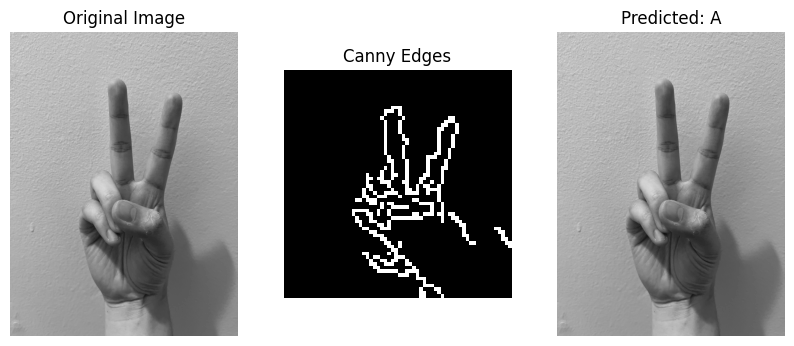

Processed K_Test.jpeg: Predicted Label - A
Prediction object: ['A']


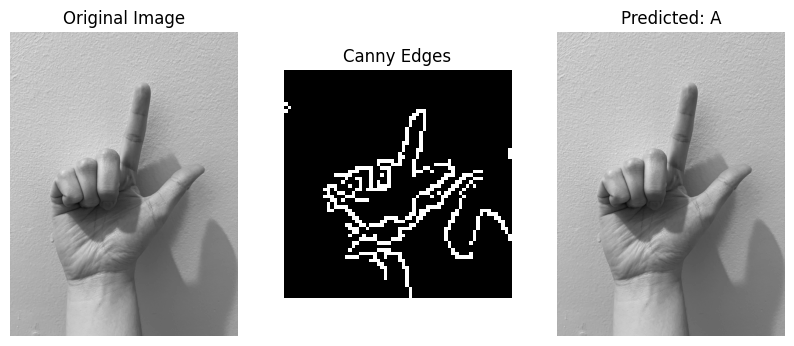

Processed L_Test.jpeg: Predicted Label - A
Prediction object: ['A']


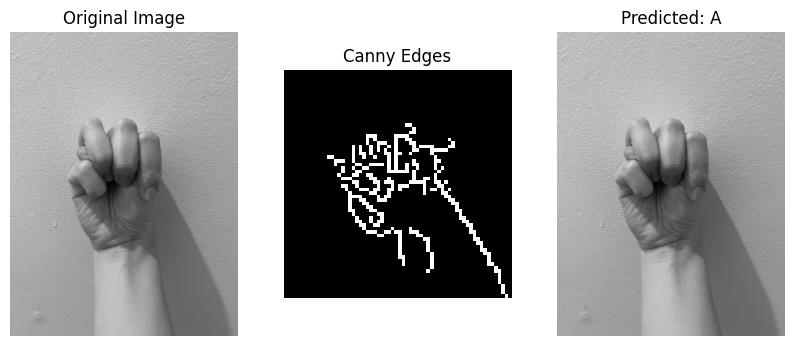

Processed M_Test.jpeg: Predicted Label - A
Prediction object: ['A']


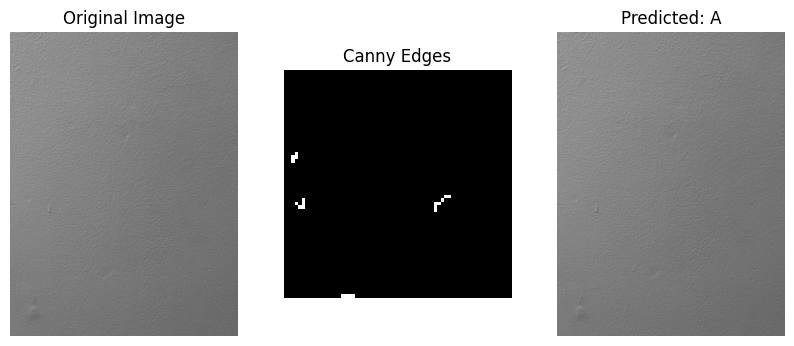

Processed Nothing_Test.jpeg: Predicted Label - A
Prediction object: ['A']


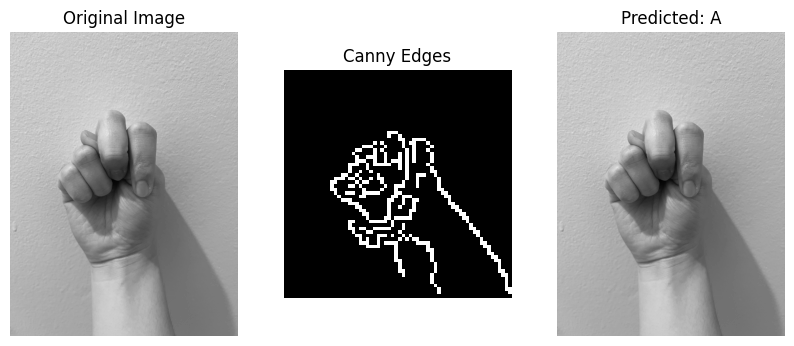

Processed N_Test.jpeg: Predicted Label - A
Prediction object: ['A']


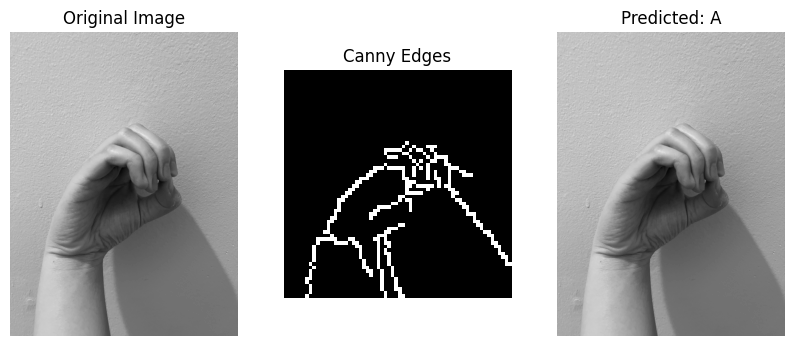

Processed O_Test.jpeg: Predicted Label - A
Prediction object: ['A']


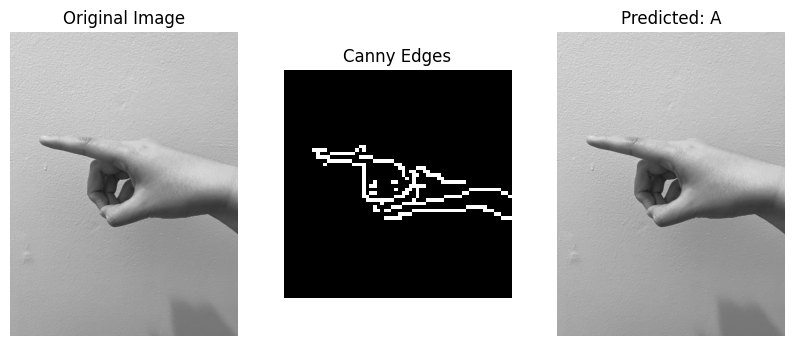

Processed P_Test.jpeg: Predicted Label - A
Prediction object: ['A']


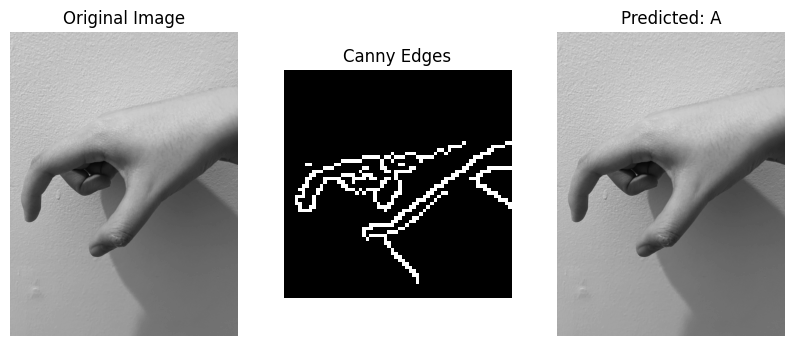

Processed Q_Test.jpeg: Predicted Label - A
Prediction object: ['A']


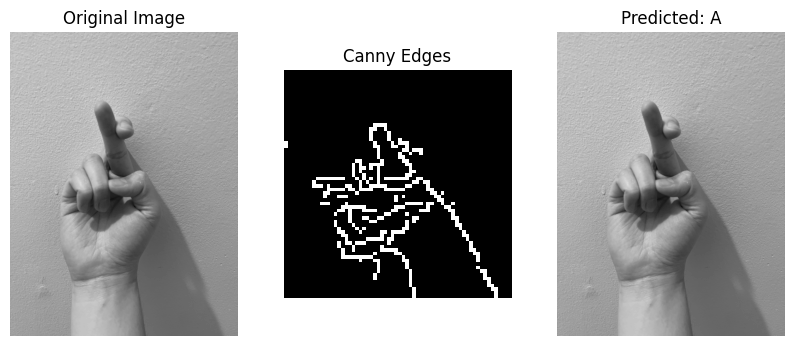

Processed R_Test.jpeg: Predicted Label - A
Prediction object: ['A']


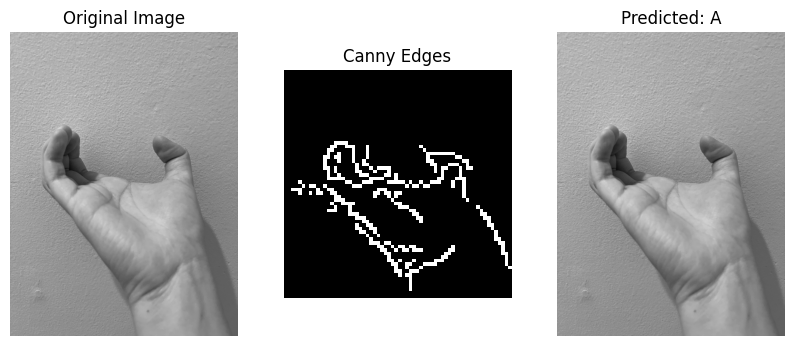

Processed Space_Test.jpeg: Predicted Label - A
Prediction object: ['A']


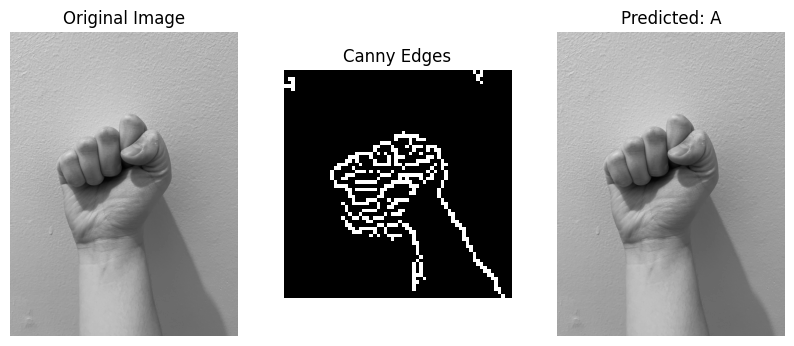

Processed S_Test.jpeg: Predicted Label - A
Prediction object: ['A']


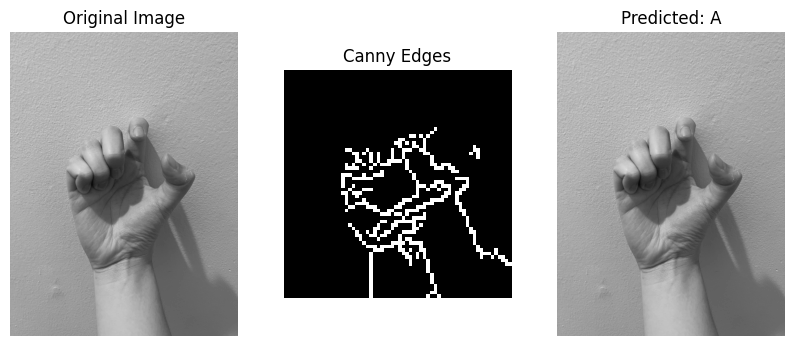

Processed T_Test.jpeg: Predicted Label - A
Prediction object: ['A']


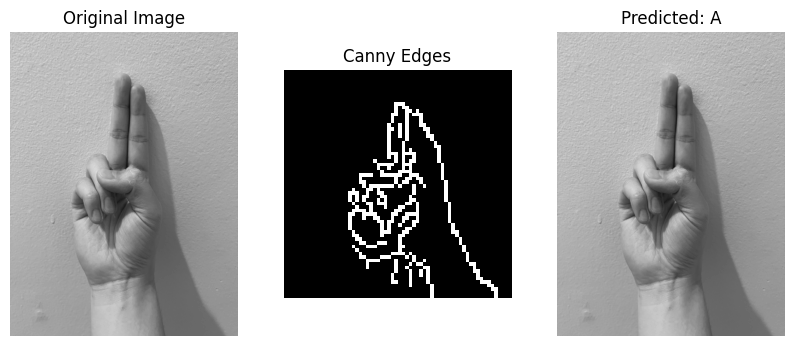

Processed U_Test.jpeg: Predicted Label - A
Prediction object: ['A']


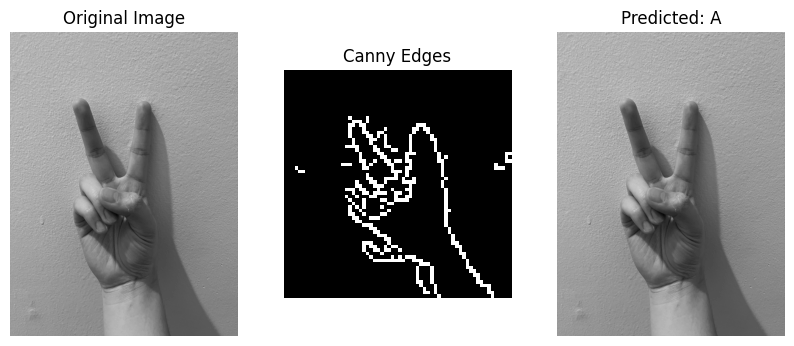

Processed V_Test.jpeg: Predicted Label - A
Prediction object: ['A']


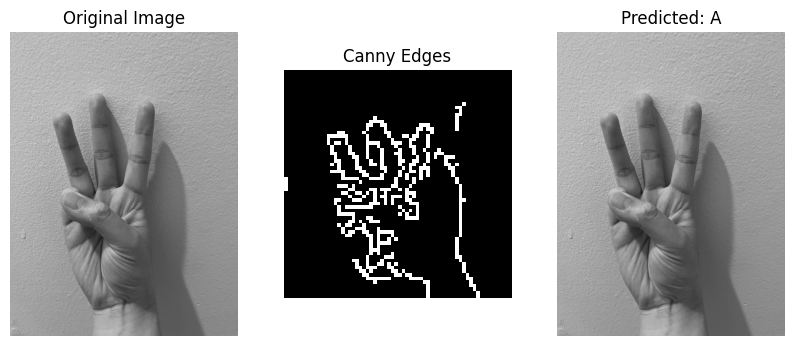

Processed W_Test.jpeg: Predicted Label - A
Prediction object: ['A']


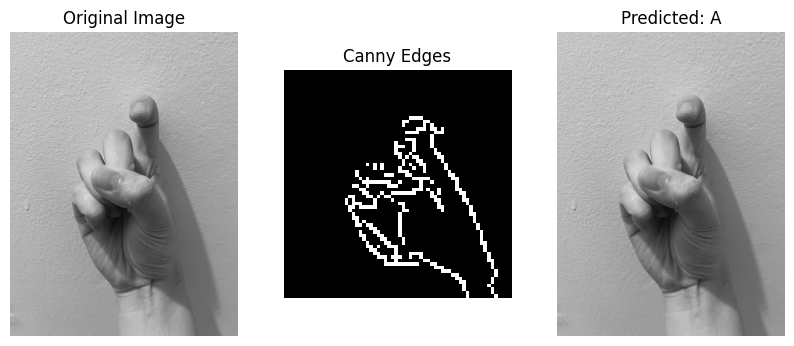

Processed X_Test.jpeg: Predicted Label - A
Prediction object: ['A']


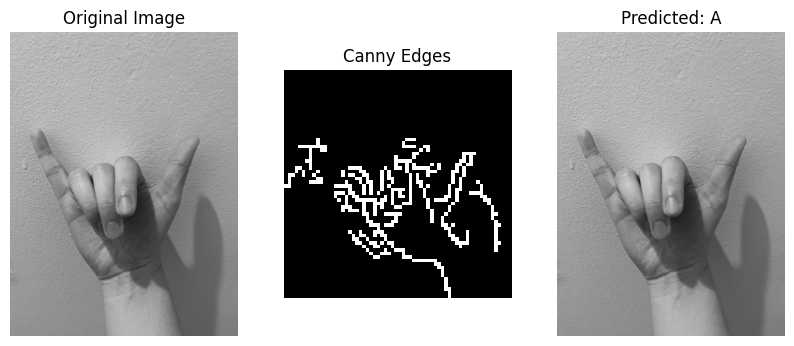

Processed Y_Test.jpeg: Predicted Label - A
Prediction object: ['A']


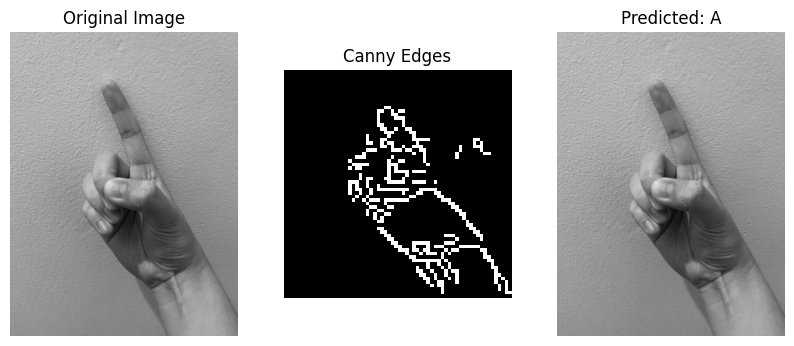

Processed Z_Test.jpeg: Predicted Label - A


In [19]:
def predict_and_visualize(image_path, model):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Image not found or unable to open.")
        return None
    
    # Resize the image to match the training data
    image_resized = cv2.resize(image, (64,64))

    # Apply Canny edge detection
    edges = cv2.Canny(image_resized, 100, 200)
    edges_normalized = edges / 255.0  # Normalize the edge pixels

    # Flatten the edges array for prediction
    features = edges_normalized.flatten().reshape(1, -1)
    # features = edges.flatten().reshape(1, -1)

    # Make prediction
    prediction = model.predict(features)
    print("Prediction object:", prediction)  # Check what prediction returns
    predicted_label = prediction[0] if prediction.size > 0 else "No prediction could be made"

    # Plot the original and the processed images
    fig, axes = plt.subplots(1, 3, figsize=(10, 5))
    
    # Display the original image
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Display the edge image
    axes[1].imshow(edges, cmap='gray')
    axes[1].set_title('Canny Edges')
    axes[1].axis('off')

    # Display both with the predicted label
    axes[2].imshow(image, cmap='gray')
    axes[2].set_title(f'Predicted: {predicted_label}')
    axes[2].axis('off')

    plt.show()
    return predicted_label

def load_and_predict_images(folder,model):
    
    for filename in os.listdir(folder):
        if filename.endswith("_Test.jpeg"):
            img_path = os.path.join(folder, filename)
            predicted_label = predict_and_visualize(img_path,model)
            print(f"Processed {filename}: Predicted Label - {predicted_label}")


test_directory = 'Test_Images'


# predicting ASL letters using KNN trained with first dataset

predicted_label = load_and_predict_images(test_directory,knn_5)



Prediction object: ['Nothing']


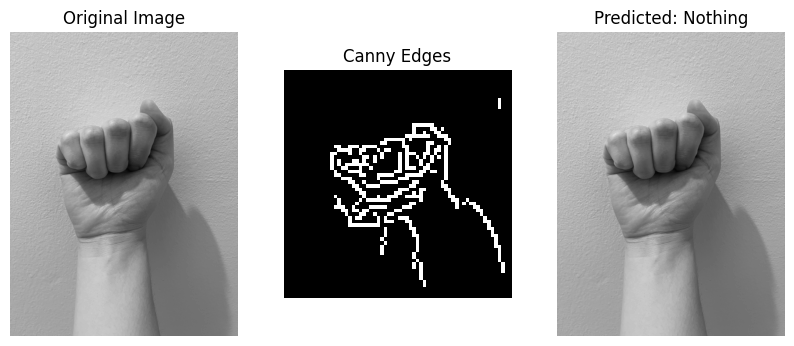

Processed A_Test.jpeg: Predicted Label - Nothing
Prediction object: ['Nothing']


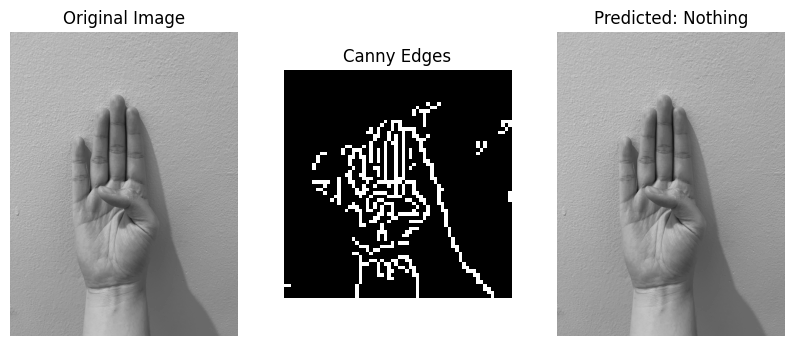

Processed B_Test.jpeg: Predicted Label - Nothing
Prediction object: ['Nothing']


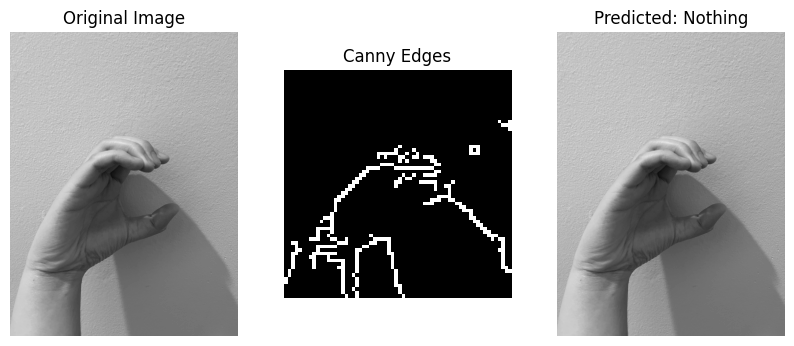

Processed C_Test.jpeg: Predicted Label - Nothing
Prediction object: ['Nothing']


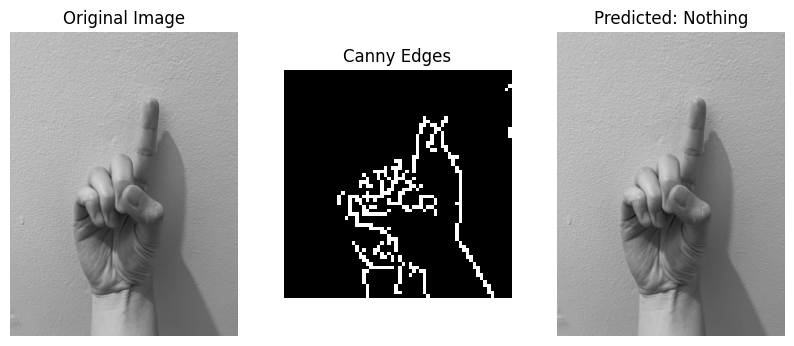

Processed D_Test.jpeg: Predicted Label - Nothing
Prediction object: ['Nothing']


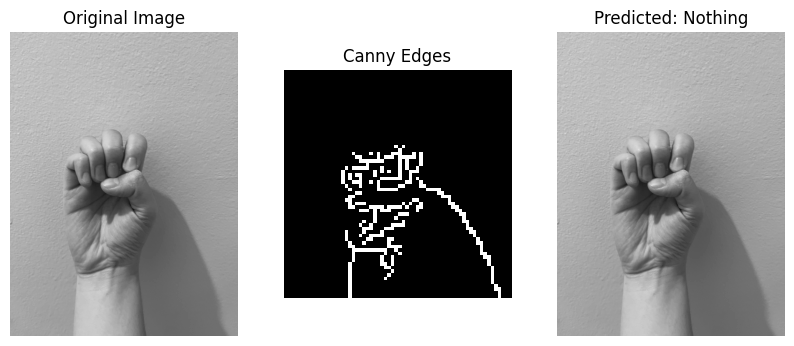

Processed E_Test.jpeg: Predicted Label - Nothing
Prediction object: ['Nothing']


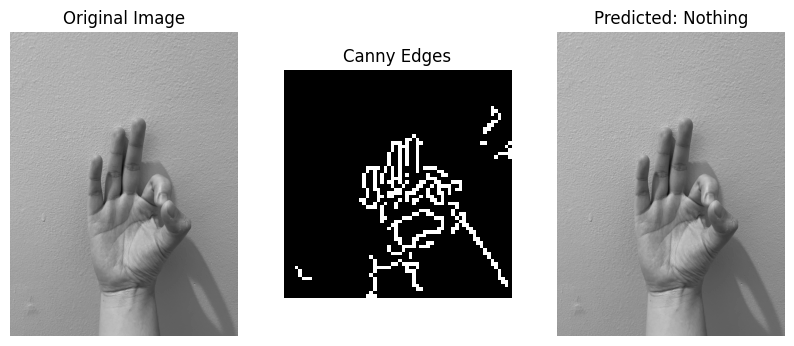

Processed F_Test.jpeg: Predicted Label - Nothing
Prediction object: ['Nothing']


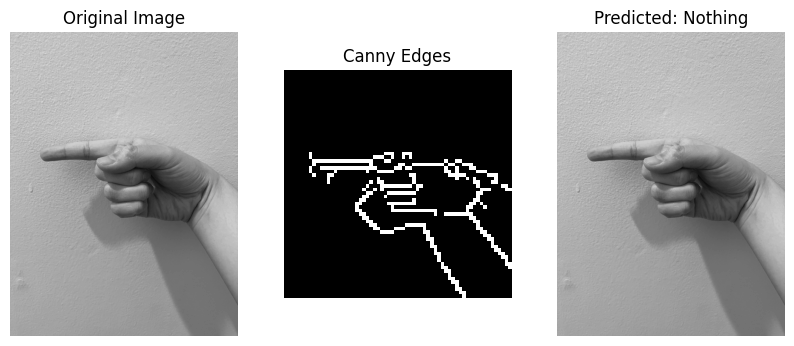

Processed G_Test.jpeg: Predicted Label - Nothing
Prediction object: ['Nothing']


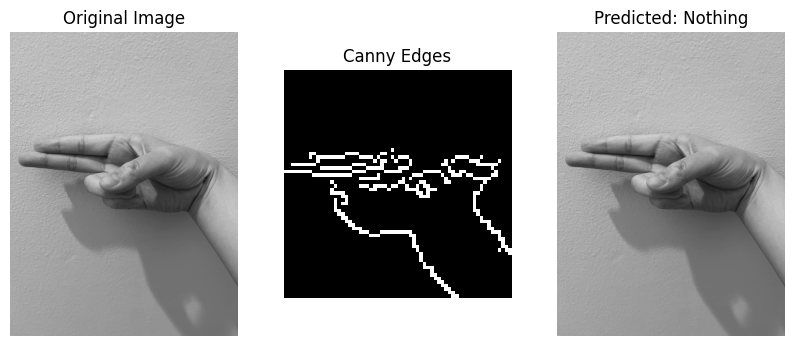

Processed H_Test.jpeg: Predicted Label - Nothing
Prediction object: ['Nothing']


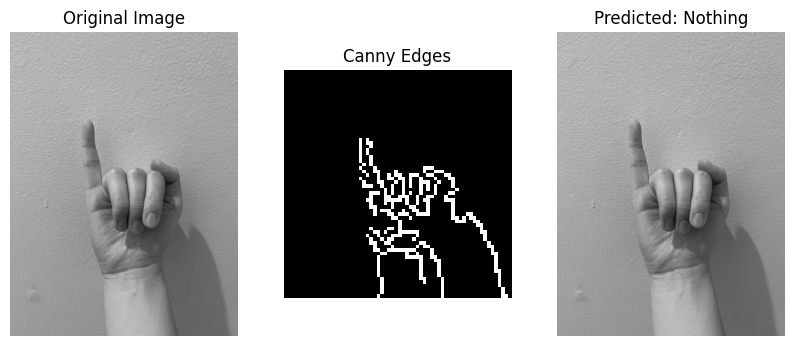

Processed I_Test.jpeg: Predicted Label - Nothing
Prediction object: ['Nothing']


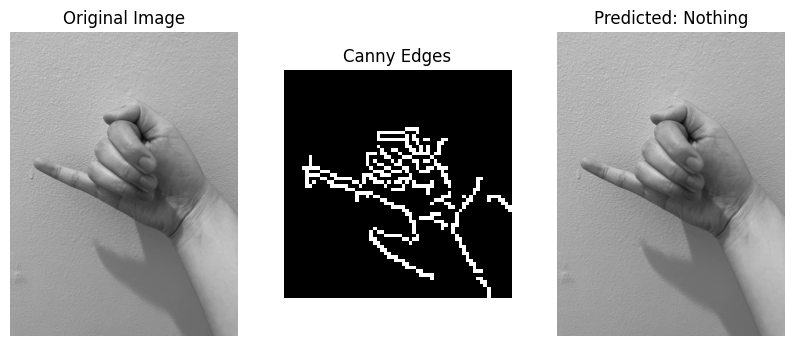

Processed J_Test.jpeg: Predicted Label - Nothing
Prediction object: ['Nothing']


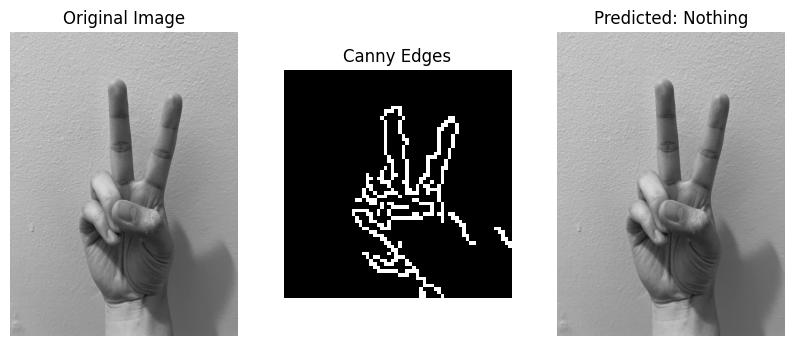

Processed K_Test.jpeg: Predicted Label - Nothing
Prediction object: ['Nothing']


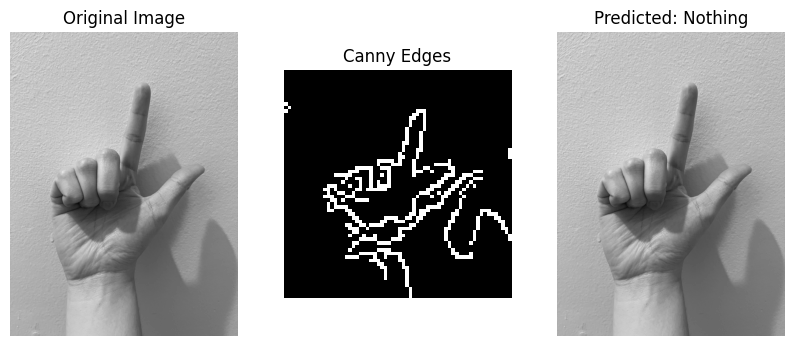

Processed L_Test.jpeg: Predicted Label - Nothing
Prediction object: ['Nothing']


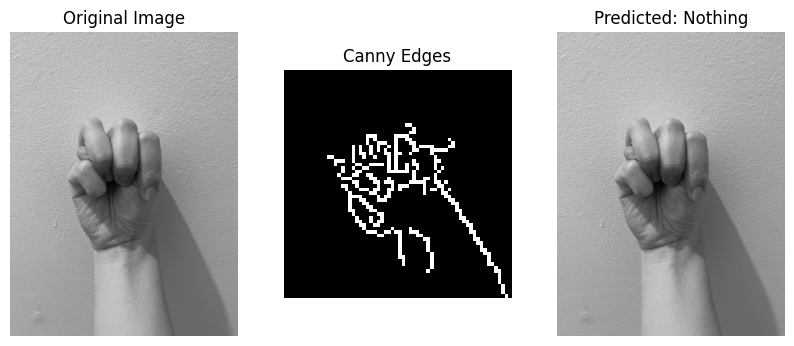

Processed M_Test.jpeg: Predicted Label - Nothing
Prediction object: ['Nothing']


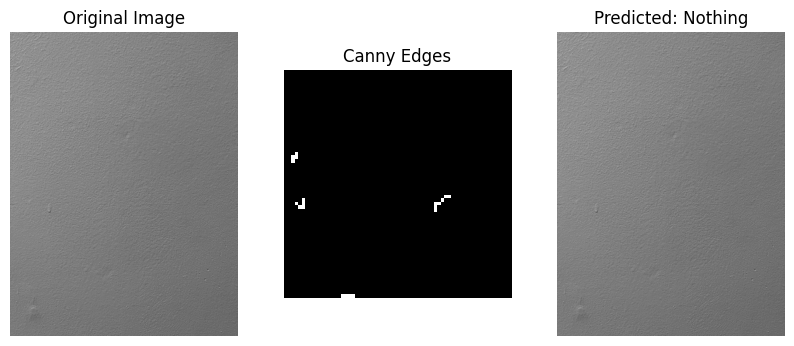

Processed Nothing_Test.jpeg: Predicted Label - Nothing
Prediction object: ['Nothing']


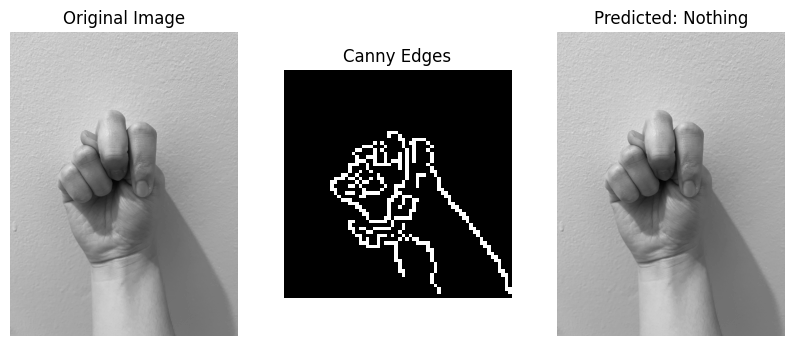

Processed N_Test.jpeg: Predicted Label - Nothing
Prediction object: ['Nothing']


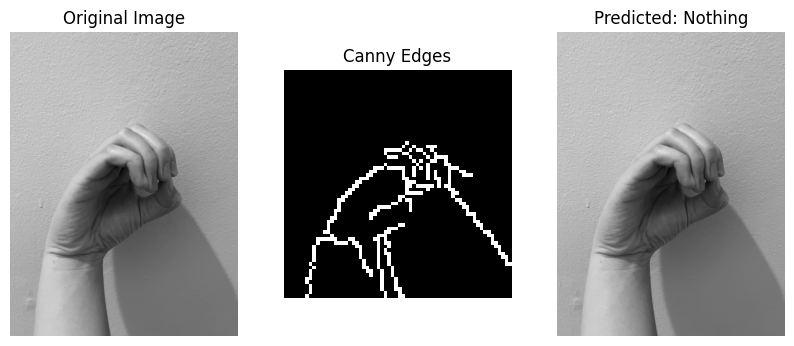

Processed O_Test.jpeg: Predicted Label - Nothing
Prediction object: ['Nothing']


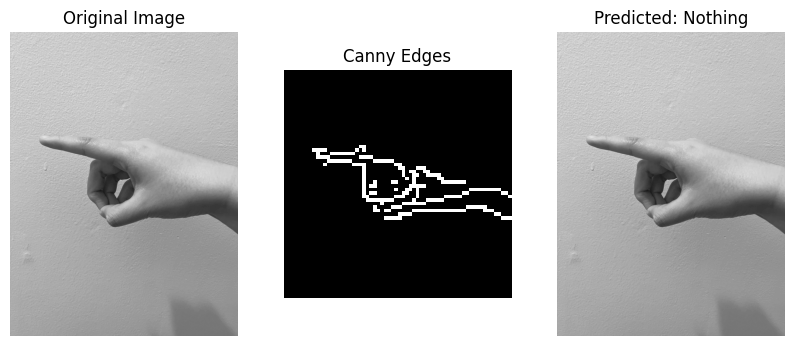

Processed P_Test.jpeg: Predicted Label - Nothing
Prediction object: ['Nothing']


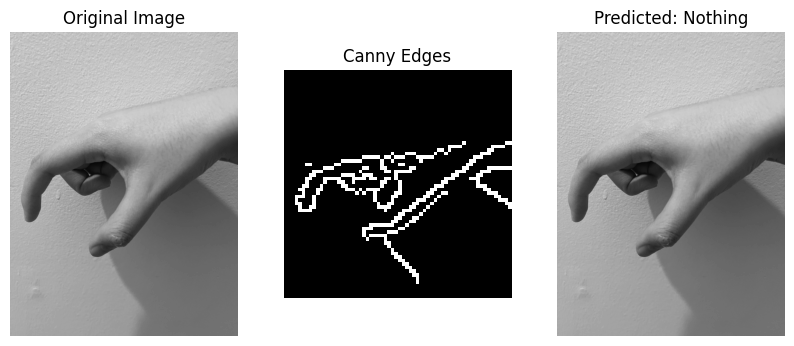

Processed Q_Test.jpeg: Predicted Label - Nothing
Prediction object: ['Nothing']


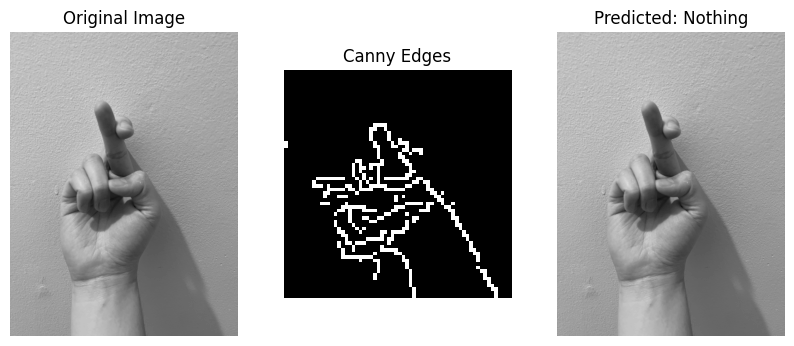

Processed R_Test.jpeg: Predicted Label - Nothing
Prediction object: ['Nothing']


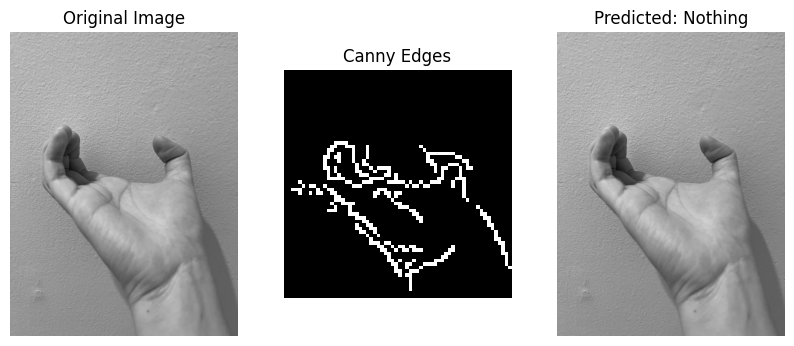

Processed Space_Test.jpeg: Predicted Label - Nothing
Prediction object: ['Nothing']


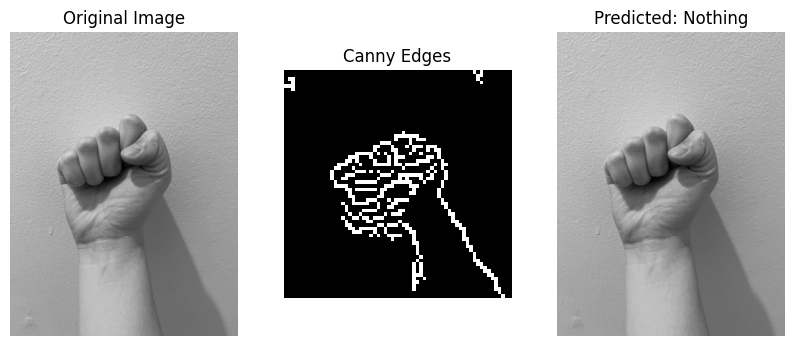

Processed S_Test.jpeg: Predicted Label - Nothing
Prediction object: ['Nothing']


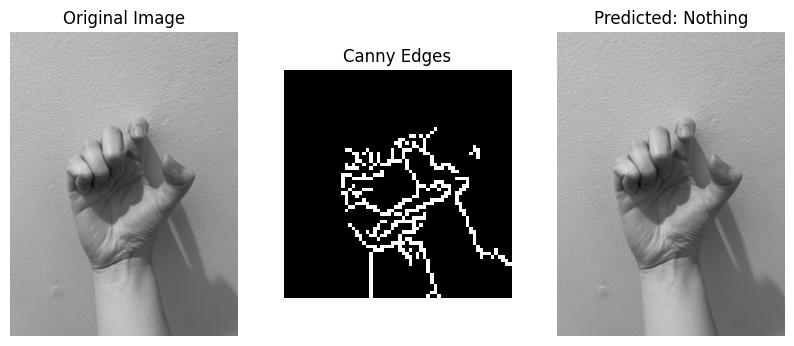

Processed T_Test.jpeg: Predicted Label - Nothing
Prediction object: ['Nothing']


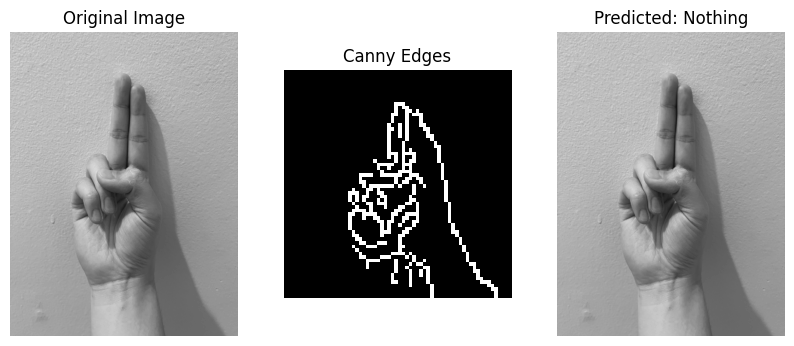

Processed U_Test.jpeg: Predicted Label - Nothing
Prediction object: ['Nothing']


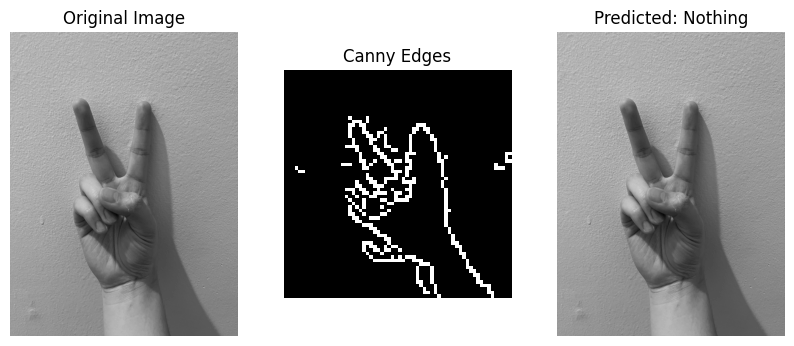

Processed V_Test.jpeg: Predicted Label - Nothing
Prediction object: ['Nothing']


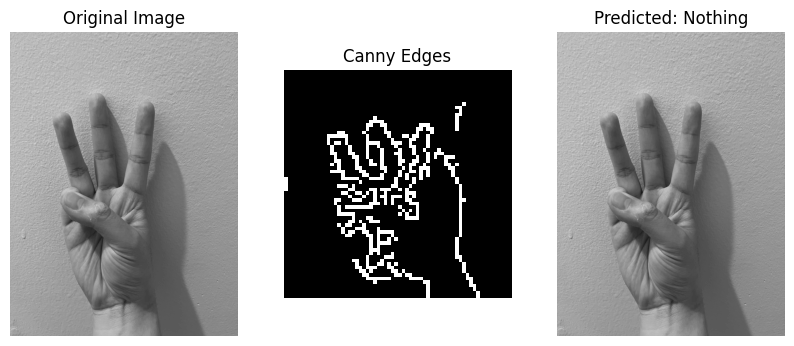

Processed W_Test.jpeg: Predicted Label - Nothing
Prediction object: ['Nothing']


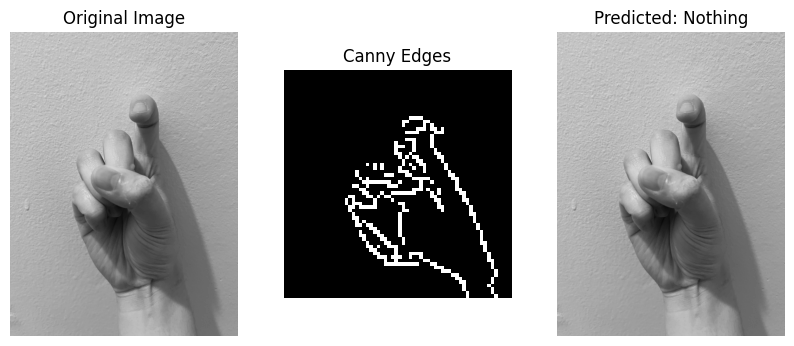

Processed X_Test.jpeg: Predicted Label - Nothing
Prediction object: ['Nothing']


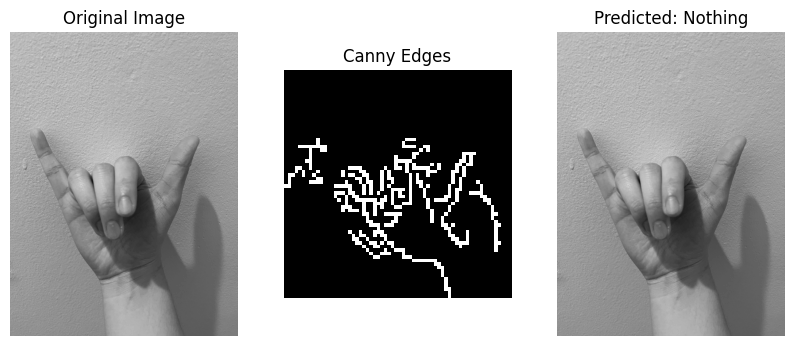

Processed Y_Test.jpeg: Predicted Label - Nothing
Prediction object: ['Nothing']


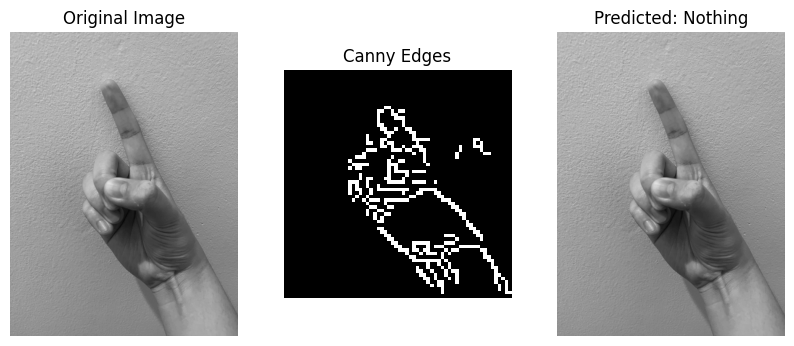

Processed Z_Test.jpeg: Predicted Label - Nothing


In [20]:
# predicting our own ASL images using the KNN model fitted to the second dataset
predicted_label = load_and_predict_images(test_directory, knn_5_2)